# Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio as iio

# Method 1: Normalized Cross Correlation

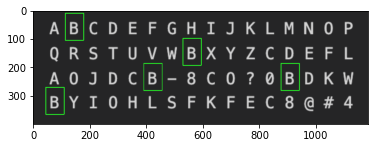

In [30]:
img = iio.imread('q7_1.png')
temp = iio.imread('q7_2.png')

def NCC(img1, img2):
    
    img1 = np.float32(img1.copy()).flatten()
    img2 = np.float32(img2.copy()).flatten()
    
    mean1 = np.mean(img1)
    mean2 = np.mean(img2)
    
    std1 = np.std(img1)
    std2 = np.std(img2)
    
    np.seterr(invalid='ignore')
    
    norm1 = (img1-mean1)/std1
    norm2 = (img2-mean2)/std2
    
    size = img1.size
    
    return (1/size)*np.sum(norm1*norm2)

def marked_image(img, pos, lx, ly):
    img = img.copy()
    for p in pos:
        x, y = p
        for i in range(img.shape[2]):
            if i==1:
                img[x:x+lx+1,y,i] = 255
                img[x,y:y+ly+1,i] = 255
                img[x+lx+1,y:y+ly+1,i] = 255
                img[x:x+lx+1,y+ly+1,i] = 255
                
    return img

def temp_matching(img, temp, tr):
    img = img.copy()
    temp = temp.copy()
    pos = []
    x, y = img[:,:,0].shape
    xt, yt = temp[:,:,0].shape
    for i in range(x-xt):
        for j in range(y-yt):
            corr = NCC(img[i:i+xt,j:j+yt,0], temp[:,:,0])
            if corr >= tr:
                cnt = 0
                for k in range(img.shape[2]-2):
                    corr = NCC(img[i:i+xt,j:j+yt,k+1], temp[:,:,k+1])
                    if corr >= tr:
                        cnt += 1
                if cnt == img.shape[2]-2:
                    pos.append((i, j))
            
    return pos, marked_image(img, pos, xt, yt)

matched = temp_matching1(img, temp, 0.95)[1]
plt.imshow(matched)
iio.imwrite('q6_res01.png', matched)

# Method 2: Using Pyramids

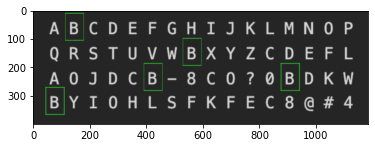

In [37]:
img = iio.imread('q7_1.png')
temp = iio.imread('q7_2.png')

def pyramid(img, n):
    img = img.copy()
    x, y, z = img.shape
    out = np.zeros((x//(2**n), y//(2**n), z))
    for i in range(z):
        for j in range(out.shape[0]):
            for k in range(out.shape[1]):
                out[j,k,i] = img[j*2**n,k*2**n,i]
    return np.uint8(out)

py_img = pyramid(img, 1)
py_temp = pyramid(temp, 1)
positions = temp_matching(py_img, py_temp, 0.93)[0]
pos = []
for p in positions:
    pos.append((p[0]*2**1, p[1]*2**1))
matched = marked_image(img, pos, temp.shape[0], temp.shape[1])
plt.imshow(matched)
iio.imwrite('q6_res02.png', matched)